
# **MIS710 Lab 6 Week 6**
Author: Associate Professor Lemai Nguyen

Objectives: 
1. To learn to build and test KNN models for classification and regression
2. To evaluate the models based on the ML problem
3. To optimise k



# **1. Import libraries and functions**

In [ ]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

# **2. Case One: Churn Prediction**

**KNN classifier**

Dataset: [Telco Customer Churn] https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## **2.1. Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/Customers.csv'

In [ ]:
#loading data
records = pd.read_csv(url)

records.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **2.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
#Inspect columns and data types to print the following outcome


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [ ]:
#totalcharges is wrongly documented as string
records['TotalCharges'] = records['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Inspect missing data, hint .isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
#As the distribution is skewed, replace the missing values with median
records['TotalCharges'].fillna(records['TotalCharges'].median(),inplace=True)


**Question.** Alternatively you can drop the datapoints with missing Total Charges, why and why not?

records.dropna(subset=['TotalCharges'], axis = 0, inplace = True)

In [ ]:
# Remove customer IDs from the data set, hint .drop(['customerID'], axis = 1)


### **EDA**

* Analyse and visualise each variable
* Any strong correlation from the dataset?  
* How to deal with categorical features? 

In [ ]:
#Inspect target variable
records.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

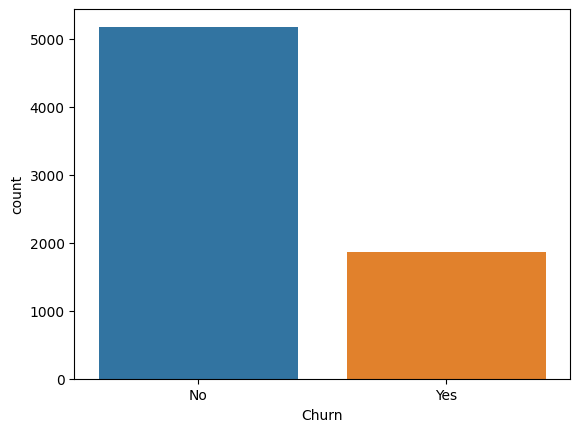

In [ ]:
sns.countplot(x=records['Churn'])

In [ ]:
cats=['gender','SeniorCitizen', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   

gender :

Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen :

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Dependents :

No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService :

Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines :

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService :

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity :

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup :

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


DeviceProtection :

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


TechSupport :

No                     3473
Yes    

In [ ]:
for i in cats:
   plt.figure()
   sns.countplot(x=records[i])

Write your own observations

In [ ]:
nums=['tenure', 'MonthlyCharges', 'TotalCharges']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')


In [ ]:
for i in nums:
  plt.figure()
  #write your own code to display boxplot for (x=records[i])


In [ ]:
for i in nums:
  plt.figure()    
  #write your owncode to display histplot(data=records, x=i,  bins=20, kde=True)


Explore relationships

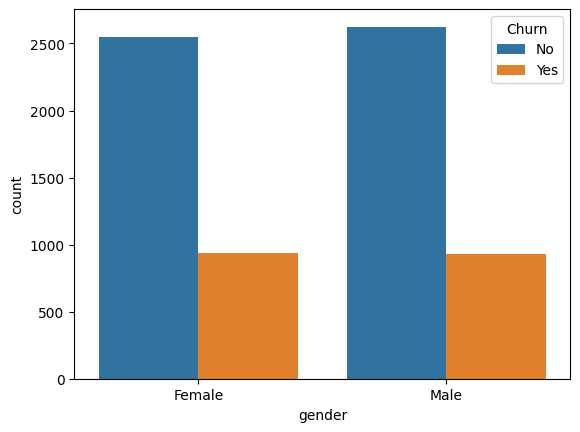

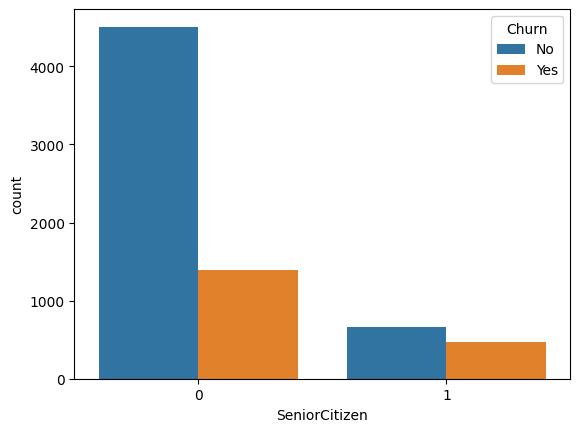

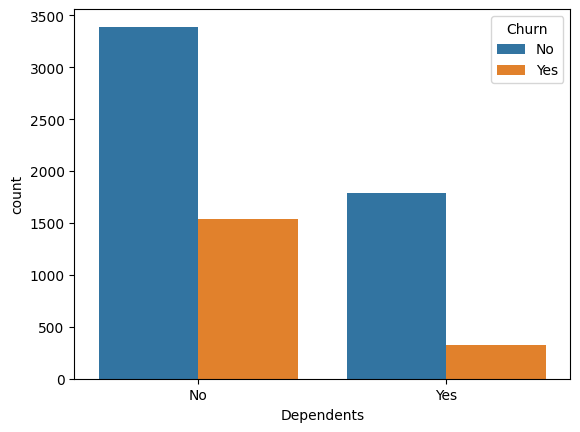

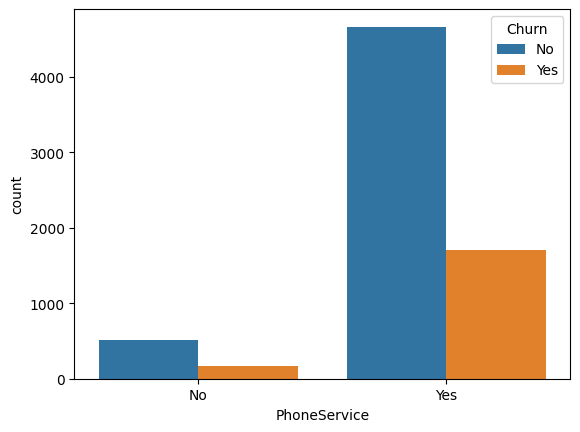

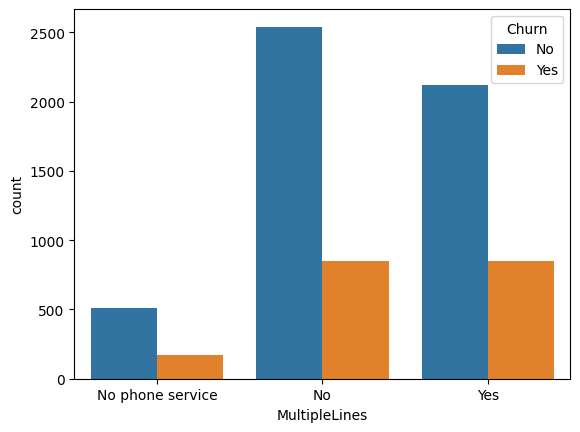

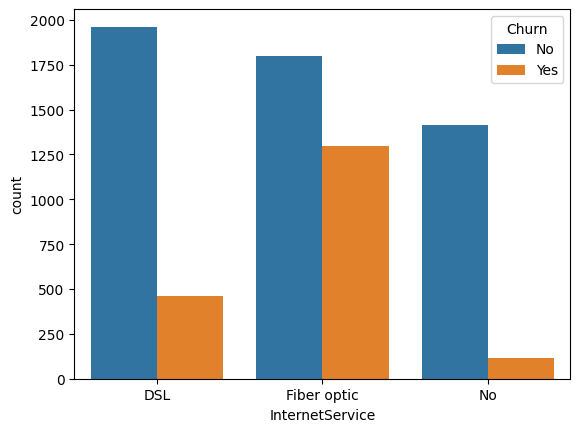

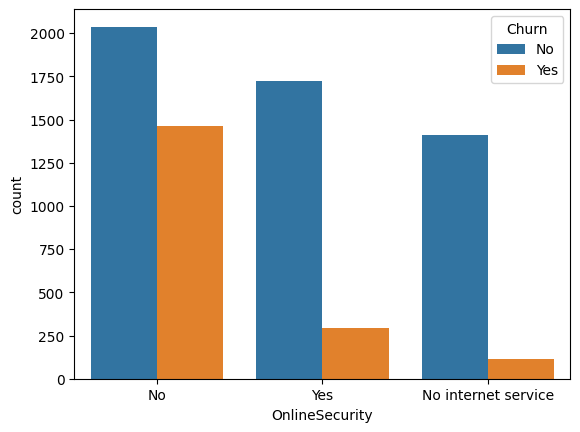

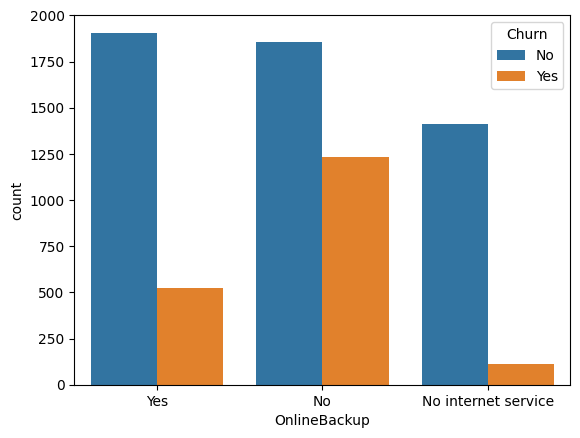

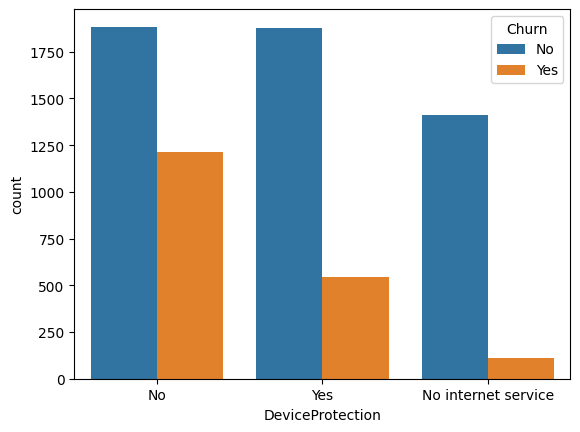

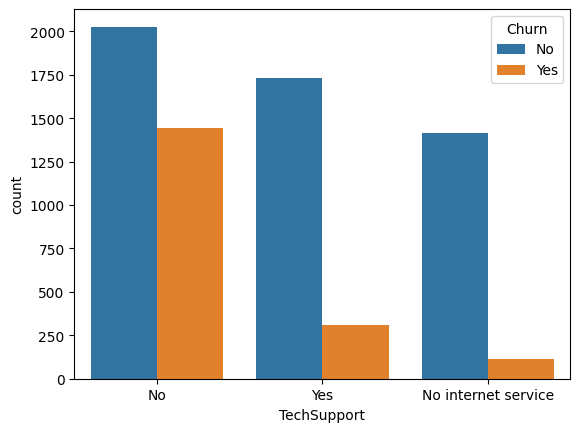

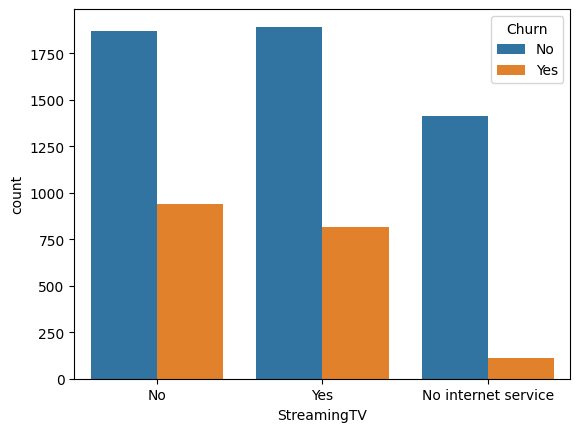

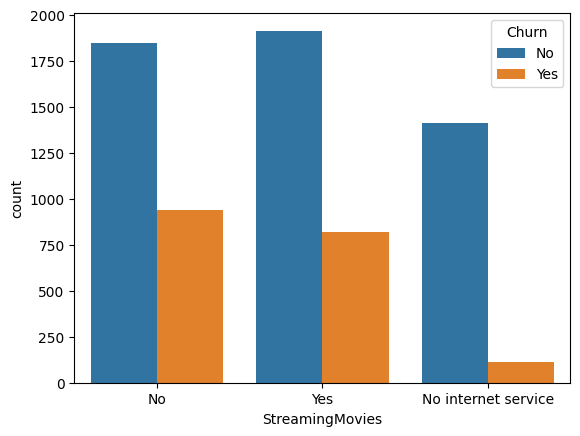

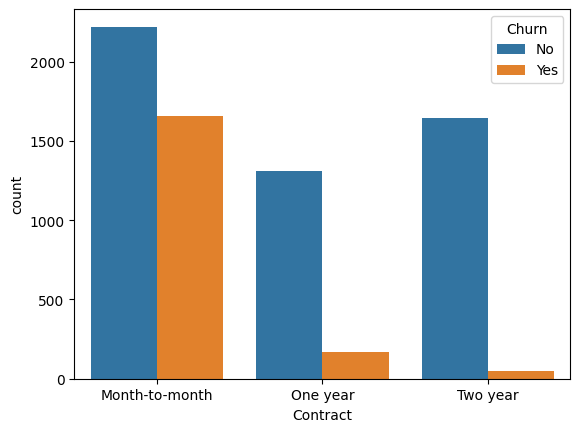

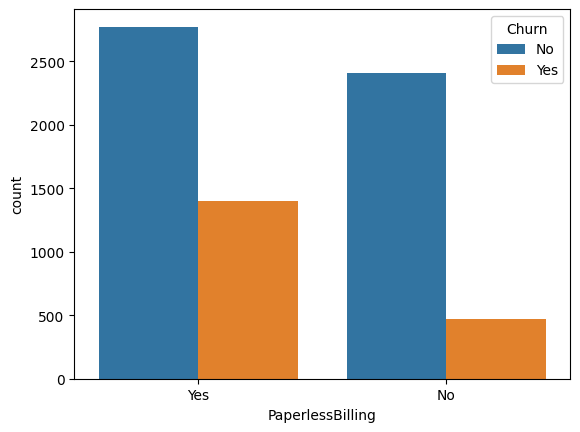

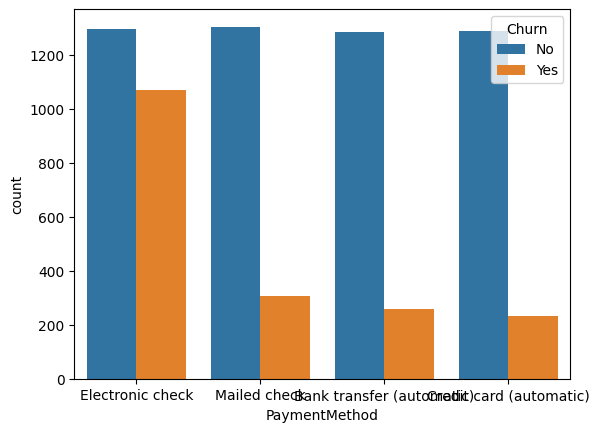

In [ ]:
for i in cats:
   plt.figure()
   sns.countplot(x=records[i], hue=records['Churn'])

In [ ]:
for i in nums:
  plt.figure()    
  sns.kdeplot(data=records, x=i, hue='Churn')

<ipython-input-21-728c3b7c2aac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), annot=True, cmap='crest')


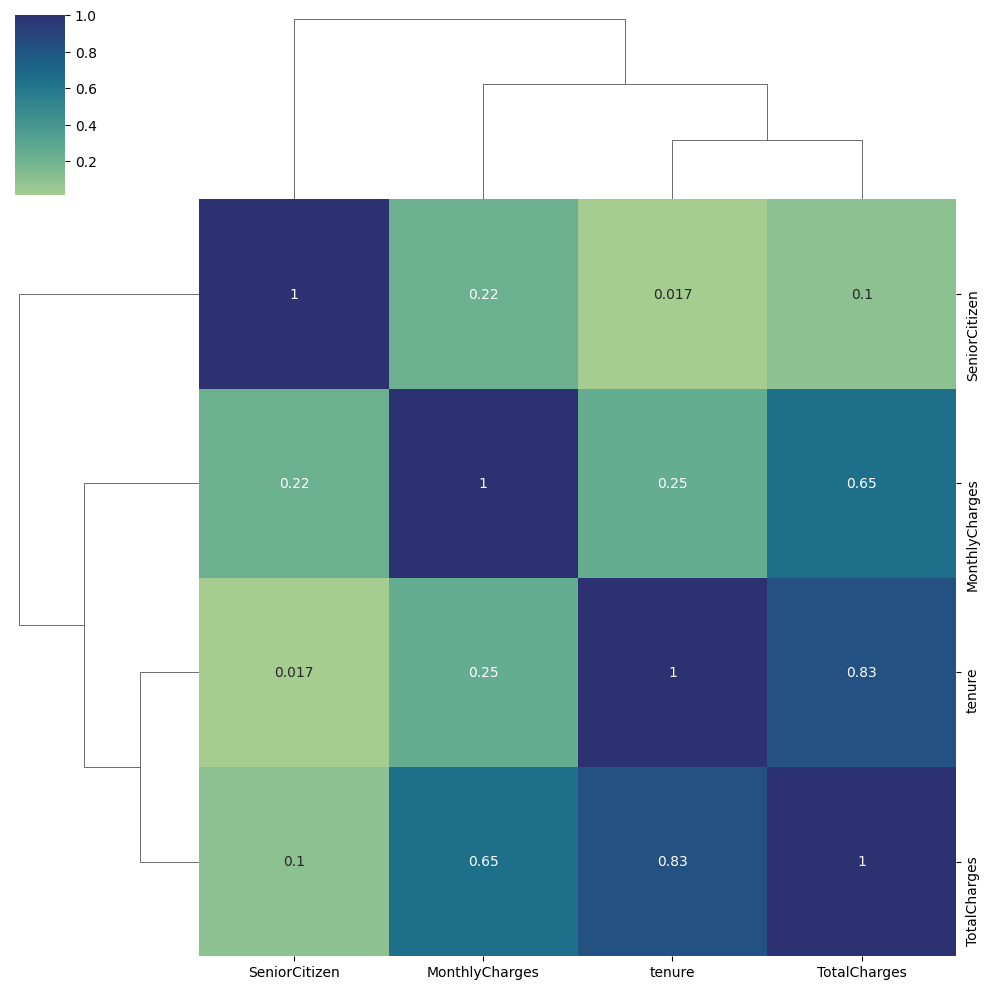

In [ ]:
sns.clustermap(data=records.corr(), annot=True, cmap='crest')

### **Data preparation**
* Feature selection
* Target specification
* Data spliting

In [ ]:
# Get the categorical columns
cat_columns = records.select_dtypes(include=['object']).columns
cat_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [ ]:
records=records.rename(columns={'Churn_Yes':'Churn'})

<Axes: >

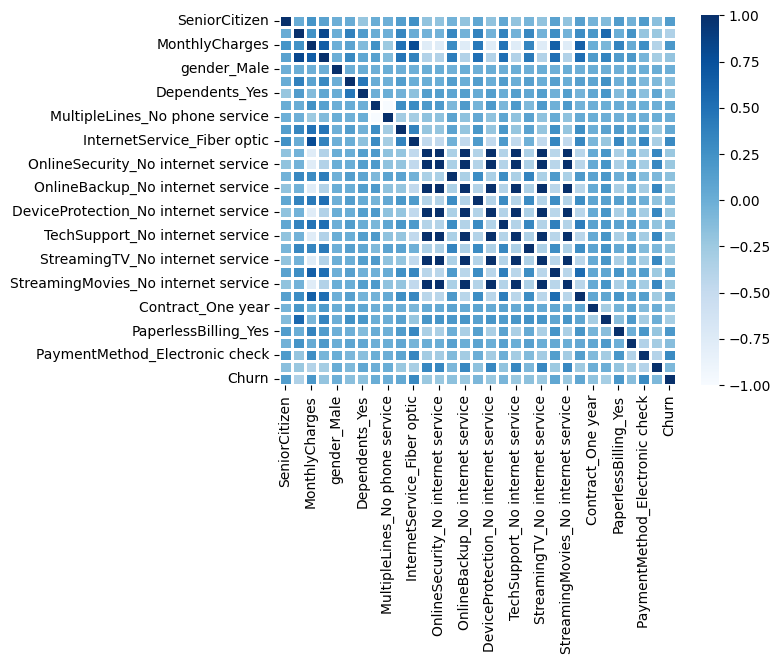

In [ ]:
#write your own code to display a heatmap for data=records.corr(), cmap="Blues"

In [ ]:
#Define predictors and label
X=records.drop('Churn', axis=1)
y=records['Churn']


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: uint8

## **2.3. KNN Classifier Model building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#import scaler
from sklearn.preprocessing import StandardScaler

It is a common practice not to scale the target variable (y_train and y_test) because it is not used as an input to the model during training or prediction.

Algorithms such as decision tree regressors, random forests, and support vector regression are generally not very sensitive to differences in scale between the input variables and target variable. 

However, algorithms such as linear regression and neural networks can be more sensitive to scale differences and may require normalization or standardization of the input variables and/or target variable.

If you scale the target variable (y_train and y_test), you would need to perform an inverse transformation on the predicted values to get them back to their original scale.

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)

In [ ]:
# Split the data into X_train, X_test, y_train, y_test hint: use train_test_split(X_norm, y, test_size=0.35, stratify = y, random_state=2023 )


## **2.4. Performance Evaluation**
* Classification report
* Confusion matrix 
* ROC and AUC

In [ ]:
# Train a KNN model
k = 15 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k) #try it with p=1 and p=2

#fit the knn with X_train and y_train

# Make predictions on the testing set



### **Classification report**

In [ ]:
# Print the confusion_matrix and classification report using y_test and y_pred


[[1575  237]
 [ 292  362]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1812
           1       0.60      0.55      0.58       654

    accuracy                           0.79      2466
   macro avg       0.72      0.71      0.72      2466
weighted avg       0.78      0.79      0.78      2466



In [ ]:
#get predicted probabilities for the main class
y_pred_probs_norm = knn.predict_proba(X_test)
y_pred_probs_norm = y_pred_probs_norm[:, 1]
print(y_pred_probs_norm)

[0.66666667 0.06666667 0.66666667 ... 0.06666667 0.13333333 0.        ]


### **ROC curve and AUC**

AUC: 0.818


<Axes: >

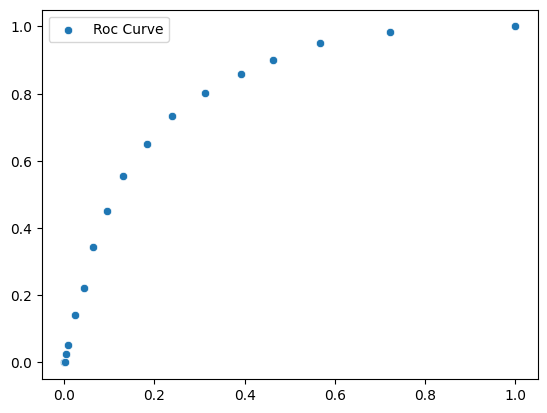

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_norm)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Probability':y_pred_probs_norm})
inspection.head(10)

### **Find the best threshold**
Find the best threshold using the thresholds in ROC curve

Examine the two blocks of code below, which one would you like to use, when and why?

In [ ]:
from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.6


In [ ]:
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.4


In [ ]:
#get predicted probabilities for best threshold
y_pred_best = (y_pred_probs_norm >= best_threshold).astype(bool)

print(y_pred_best)
 
 

[ True False  True ... False False False]


In [ ]:
#print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[1378  434]
 [ 175  479]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1812
           1       0.52      0.73      0.61       654

    accuracy                           0.75      2466
   macro avg       0.71      0.75      0.72      2466
weighted avg       0.79      0.75      0.76      2466



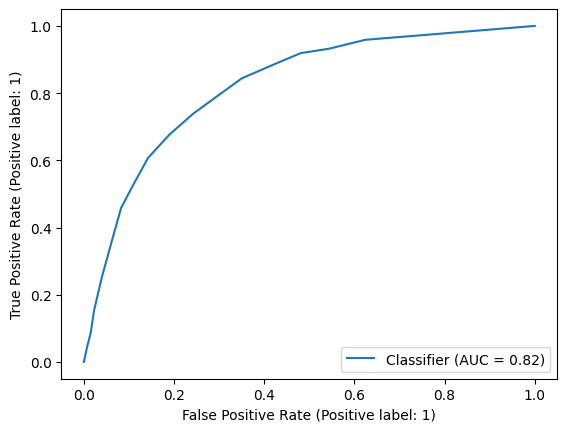

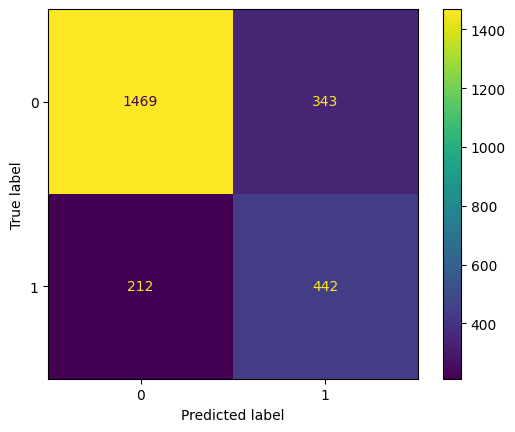

In [ ]:
#what is displayed in the outcomes?
RocCurveDisplay.from_predictions(y_test, y_pred_probs_norm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()


In [ ]:
#Model evaluation with the original predictions 
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ", '%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


Accuracy:  0.785
Precision:  0.604
Recall:  0.554
F1:  0.578


In [ ]:
#Now that we have the y_pred_best for the best threshold, generate the above evaluation results for it 



Accuracy:  0.753
Precision:  0.525
Recall:  0.732
F1:  0.611


## **2.5. Optimising k**
based on accuracy

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
best_f1=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k=knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_f1 = metrics.f1_score(y_test, y_pred_k)

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")
print(f"F1 score for best accuracy: {best_f1:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

**Optimise k based on f1_score**

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values
best_k=0
best_f1=0
best_accuracy=0
f1_scores = []
f1 = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k=knn.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred_k)
    f1_scores.append(f1)
    accuracy_k=metrics.accuracy_score(y_test, y_pred_k)
    if ((f1 > best_f1) ):
        best_k = k
        best_f1 = f1
        best_accuracy = metrics.accuracy_score(y_test,y_pred_k)

# Find the best k value with highest f1 score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"Accuracy for Best F1 score: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('F1 scores for different k values')
plt.plot(k_values, f1_scores, color='blue')
plt.show()

**Try it yourself!**

* Rebuild the model with the optimal k
* Evaluate the model

## **Insight: KNNImputer**

KNNImputer looks at the K nearest neighboring data points that have complete information for a variable with missing and takes an average (or median) of those values to fill in the missing value. The value of K is specified by the user as a hyperparameter.

from sklearn.impute import KNNImputer

**Impute missing data using KNN imputation**
imputer = KNNImputer(n_neighbors=5)
records[['TotalCharges_imputed']] = imputer.fit_transform(records[['TotalCharges']])

**Try it the above code yourself**

Note: KNNImputer cannot be directly applied to categorical data. 

# **3. Case Two: Insurance Premium Estimation**

**KNN regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance 

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?

## **3.1 Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'


In [ ]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **3.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Inspect missing data
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


### **EDA**

* Analyse and visualise each variable
* Any strong correlation from the dataset?  
* How to deal with categorical features? 

In [ ]:
records.describe()

,age,bmi,dependants,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


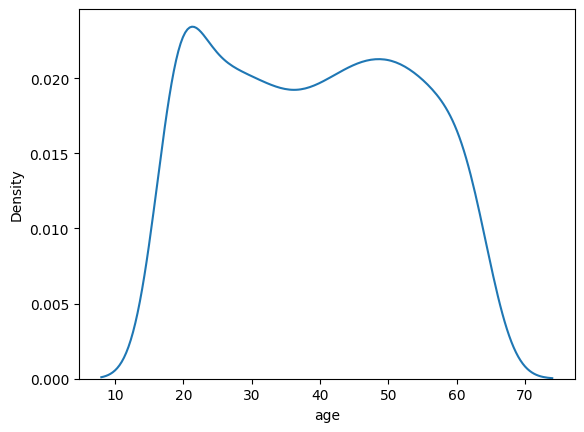

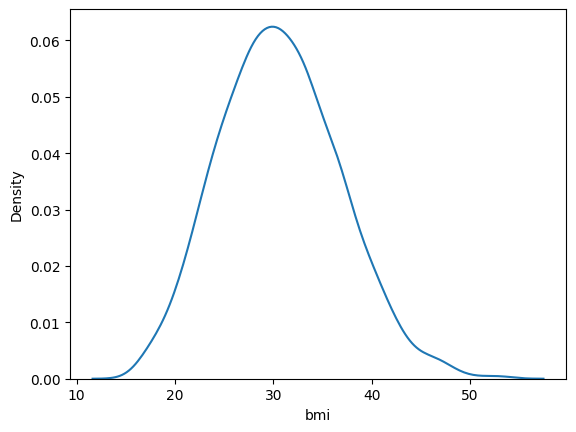

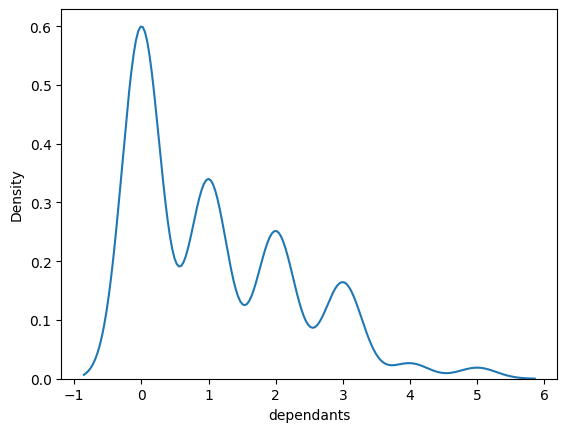

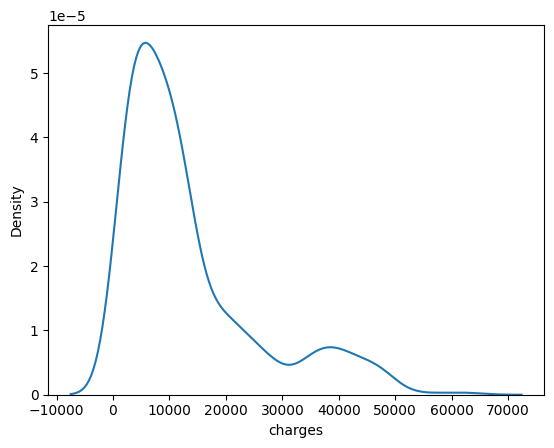

In [ ]:
nums=['age','bmi', 'dependants', 'charges']
for i in nums:
  plt.figure()
  #write code to display kdeplot(data=records, x=i)

<Figure size 640x480 with 0 Axes>

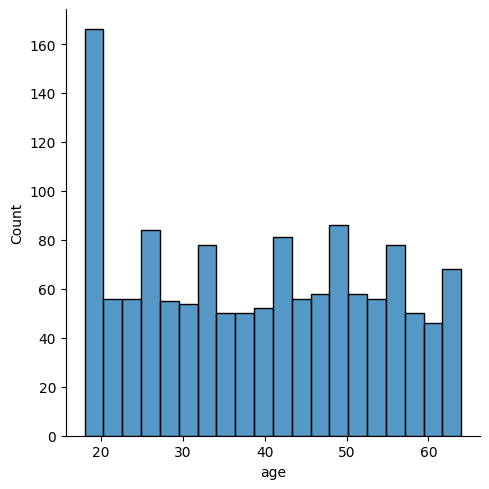

<Figure size 640x480 with 0 Axes>

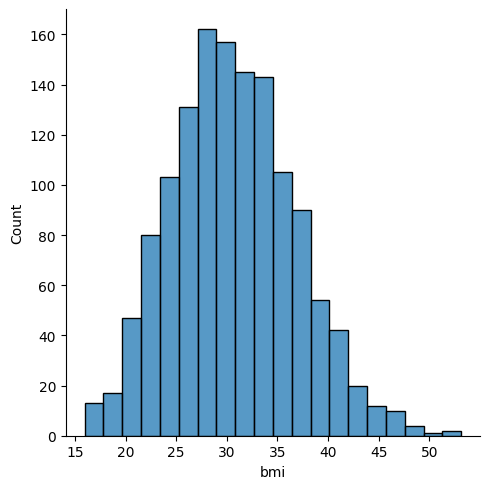

<Figure size 640x480 with 0 Axes>

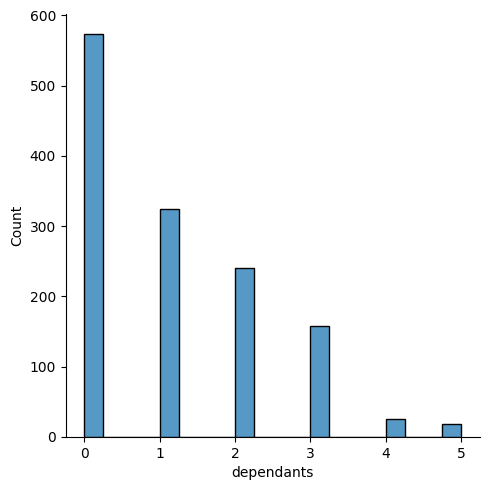

<Figure size 640x480 with 0 Axes>

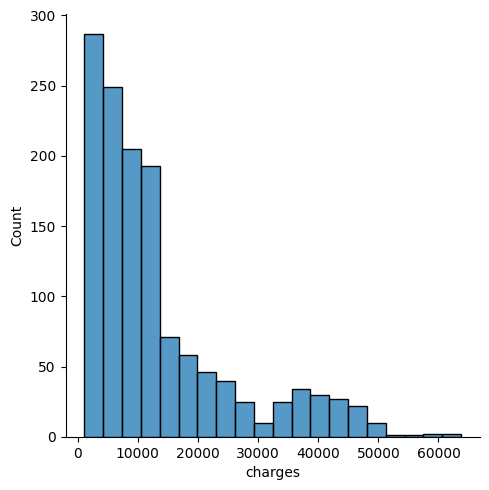

In [ ]:
for i in nums:
  plt.figure()
  #write code to display displot for each numerical variable (data=records, x=i, bins=20)

In [ ]:
cats=['sex','smoker', 'region', 'dependants']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')

sex :

male      676
female    662
Name: sex, dtype: int64


smoker :

no     1064
yes     274
Name: smoker, dtype: int64


region :

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


dependants :

0    574
1    324
2    240
3    157
4     25
5     18
Name: dependants, dtype: int64




sex :

smoker :

region :

dependants :



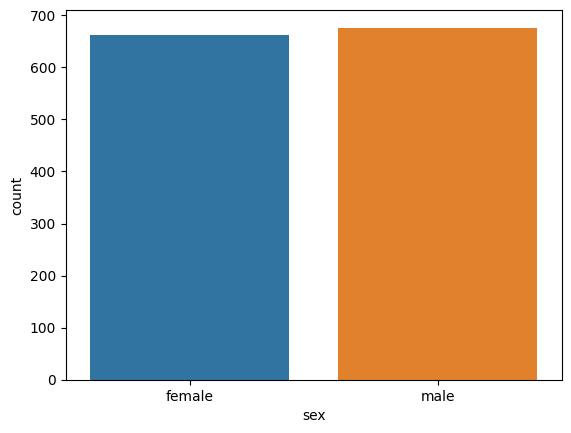

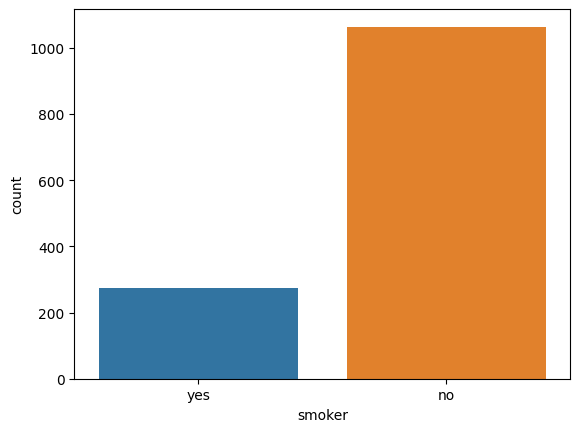

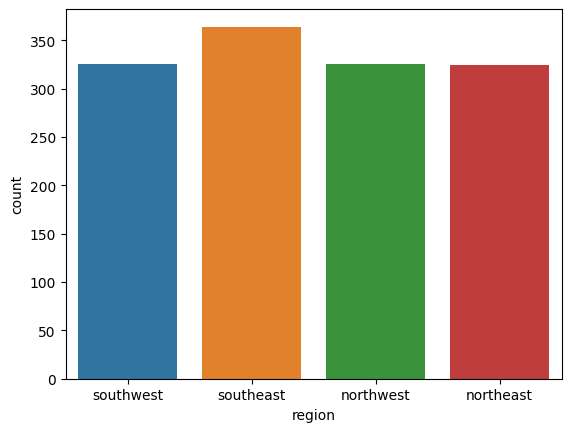

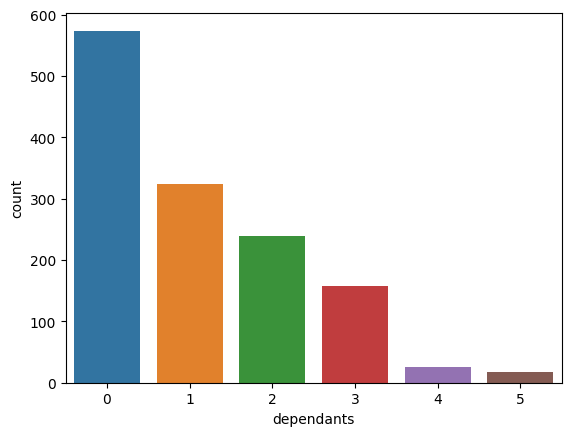

In [ ]:
for i in cats:
   print(i, ':\n')
   plt.figure()
   sns.countplot(data=records, x=i)

Write your observations of the following graphs

<Axes: xlabel='age', ylabel='Density'>

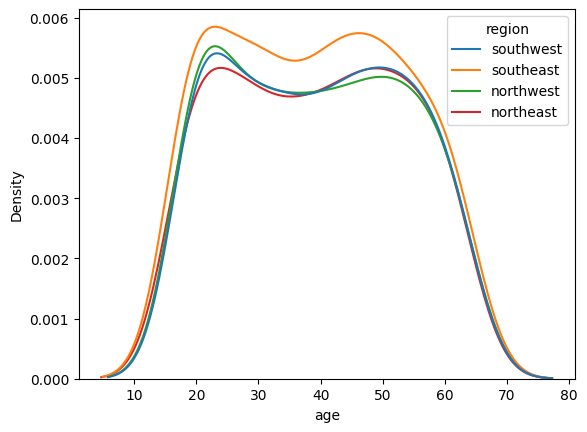

In [ ]:
sns.kdeplot(data=records, x='age', hue='region')

<Axes: xlabel='charges', ylabel='Density'>

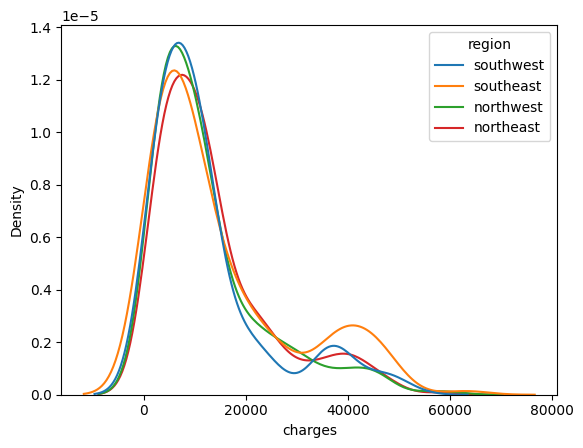

In [ ]:
sns.kdeplot(data=records, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='Density'>

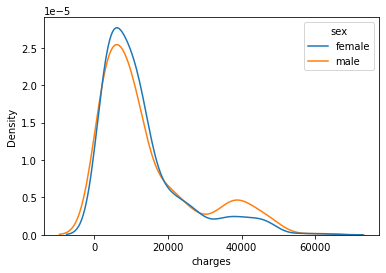

In [ ]:
#Write your own code to generate the graph below

<Axes: xlabel='age', ylabel='charges'>

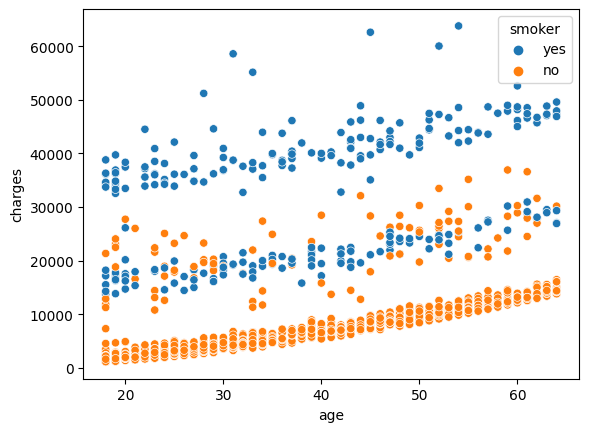

In [ ]:
sns.scatterplot(data=records, x='age', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

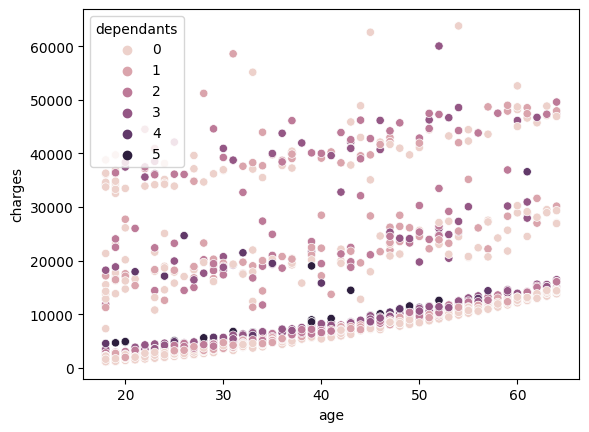

In [ ]:
#write your own code to display the below

**Your task:** Write your observation for the graph below:

<Axes: xlabel='charges', ylabel='smoker'>

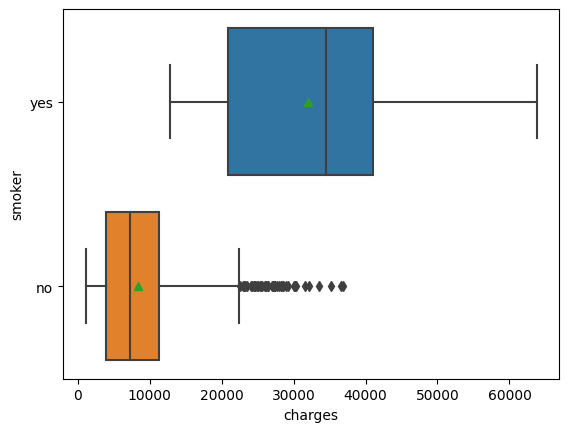

In [ ]:
sns.boxplot(data=records, x='charges', y='smoker', showmeans=True)

<AxesSubplot:xlabel='charges', ylabel='region'>

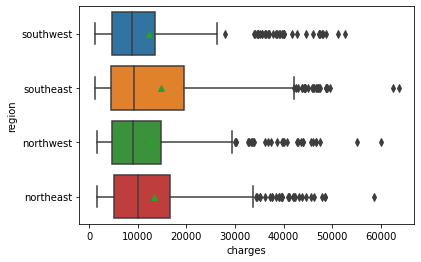

In [ ]:
#write your owncode to display the following

<AxesSubplot:xlabel='charges', ylabel='sex'>

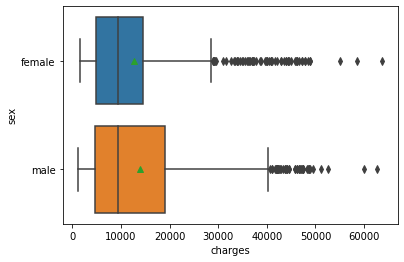

<ipython-input-148-551c9746ebff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)


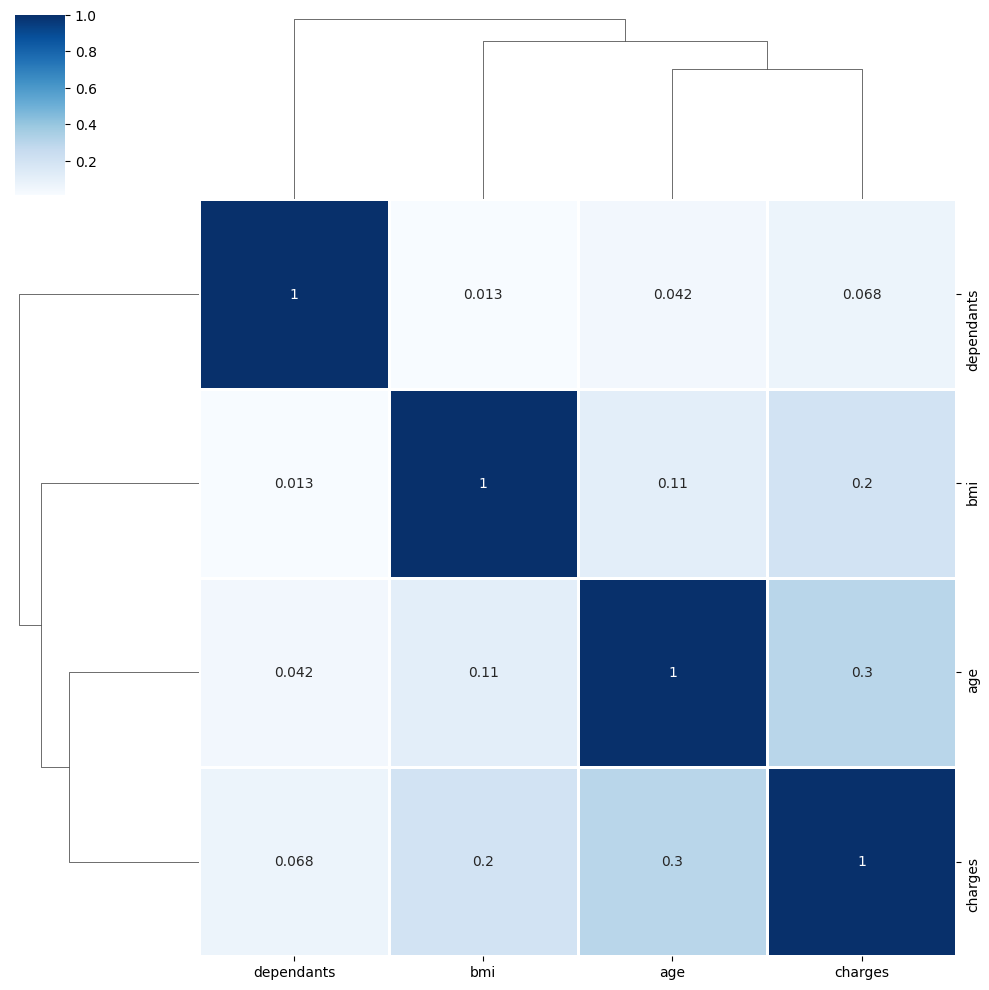

In [ ]:
#visualise clustermap
sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

In [ ]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex', 'region'], drop_first=True)

print(records.info())

In [ ]:
#convert categorical data to numerical 
def coding_smoking(x):
    if x=='yes': return 1
    if x=='no': return 0
       
records['smoker'] = records['smoker'].apply(coding_smoking)

In [ ]:
records.info()

### **Data preparation**

* Feature selection: X
* Target specification: y
* Scale data
* Data spliting: X_train, X_test, y_train, y_test

In [ ]:
X=records.drop('charges', axis=1)
y=records['charges']

We don't often scale the target variable (y_train and y_test) in regression problems because it is not used as an input to the model during training or prediction. If models are sensitive to scale (eg linear regression) then it is good to scale y as well.

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)

In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

## **3.3. KNN Model building**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Create a KNN regressor object
k=5
knn = KNeighborsRegressor(k)

# Fit the model to the training data



KNeighborsRegressor()

## **3.4. Performance Evaluation**
* Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable. 

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination. 

In [ ]:
# Predict the house prices for the testing data
y_pred = knn.predict(X_test)

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head()

In [ ]:
# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print("Root Mean Squared Error: {:.3f}".format(rmse))
print("R Squared: {:.3f}".format(r2))
print("Absolute Squared Error: {:.3f}".format(mae))

Root Mean Squared Error: 5384.408
R Squared: 0.794
Absolute Squared Error: 3343.831


In [ ]:
#Write code to review descriptive stars for the target charges

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

**Your task:** Write your own interpretation of the model performance

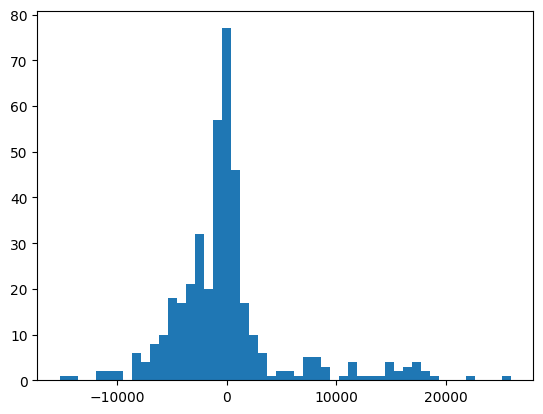

In [ ]:
#Plot residuals, i.e. the differences between the actual and predicted values. 
plt.hist(x=y_test-y_pred, bins=50)
plt.xlabel='error'
plt.ylabels='count'
plt.show()

In [ ]:
#if plt.xlabel() plays up, you can reload plt 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

<Axes: xlabel='charges', ylabel='Density'>

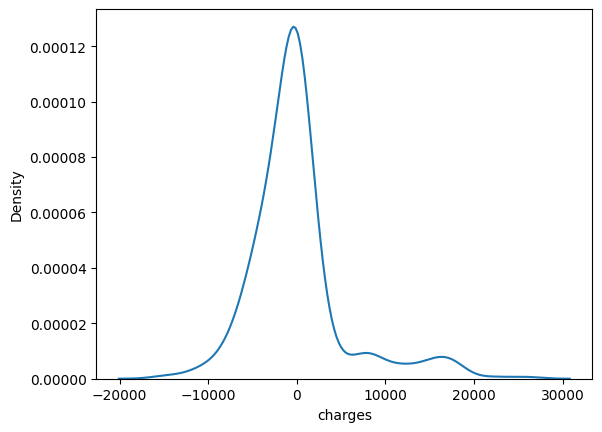

In [ ]:
sns.kdeplot(x=y_test-y_pred)

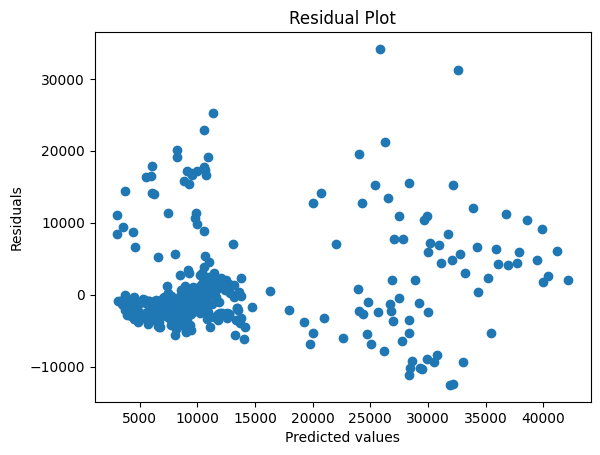

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, y_test-y_pred)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

## **3.5. Optimising k**
based on rmse

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values
best_k=32
best_rmse=30000000
error_rates=[]
for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    error_rates.append(rmse)
    if rmse <= best_rmse:
        best_k = k
        best_rmse = rmse

# Find the best k value with highest accuracy score
print(f"Best k value: {best_k}")
print(f"Best rmse: {best_rmse:.3f}")


Best k value: 11
Best mse: 5306.264


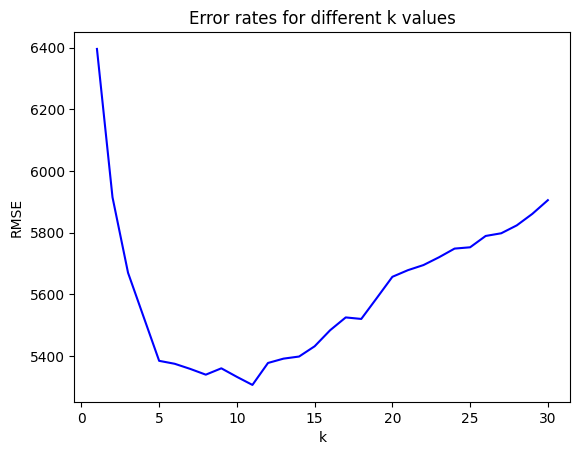

In [ ]:
# Plot k values against accuracy scores
plt.ylabel('RMSE')
plt.xlabel('k')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

**Your task:** Write your code to optimise k based on another metric

**Try it yourself!**

* Rebuild the model with the optimal k
* Evaluate the model

# **4. Do it yourself**

Now practise what you have learned in this topic with previous datasets that you are familiar with, such as the Titanic, Biopsy and House Price datasets
